# Image preprocessing and Data Augmentation

In this notebook, we'll explore common techniques of image preprocessing and data augmentation. We used OpenCV for demonstration, but you can use various frameworks like TensorFlow and Torch that automatically handle the images for you with only a few lines of code. 

In [65]:
import cv2
from PIL import Image
import numpy as np

In [66]:
# fetch an image
!wget -O image.jpg https://i.imgur.com/YYiXsV5.png

--2022-11-16 11:09:19--  https://i.imgur.com/YYiXsV5.png
Resolving i.imgur.com (i.imgur.com)... 146.75.72.193
Connecting to i.imgur.com (i.imgur.com)|146.75.72.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1757467 (1.7M) [image/png]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   1.68M  8.14MB/s    in 0.2s    

2022-11-16 11:09:20 (8.14 MB/s) - ‘image.jpg’ saved [1757467/1757467]



In [67]:
image = cv2.imread("image.jpg")

Normally, you can just use `cv2.imshow(image)`, but it will block the kernel in Jupyter Notebook. Let's define a function to dipslay an image right below the cell.

In [68]:
def imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert color channel to be PIL-compatible
    im_pil = Image.fromarray(image) # make a PIL (Python Image Library) image
    display(im_pil) # display is Jupyter Notebook's own method

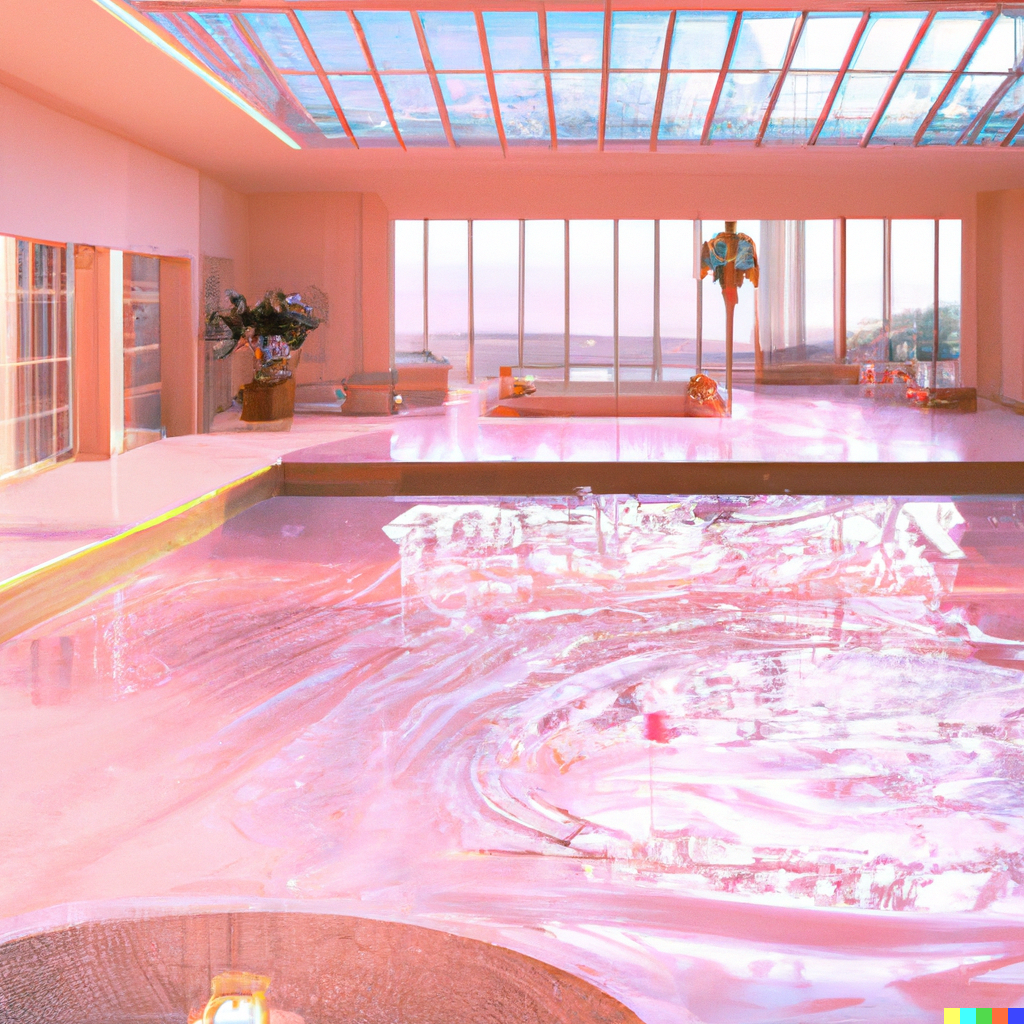

In [69]:
imshow(image)

Trivia: Do you see the mark on the bottom right corner? This image was generated by [OpenAI Dalle 2](https://openai.com/dall-e-2/).

## Geometric Transformations

### Scailing

In [70]:
(h, w) = image.shape[:2] # get the image size

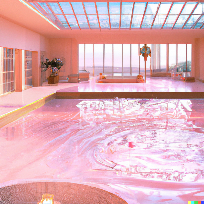

In [71]:
#percent by which the image is resized
scale_percent = 20

#calculate the 50 percent of original dimensions
new_w = int(w * scale_percent / 100)
new_h = int(h * scale_percent / 100)
new_size = (new_w, new_h)

# resize image
scaled = cv2.resize(image, new_size)
imshow(scaled)

The image is quite big, so let's move on with this image.

In [72]:
image = scaled

### Rotation

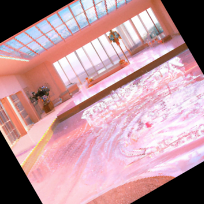

In [73]:
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), 30, 1.0)  # apply a matrix transformation to our image matrix
rotated = cv2.warpAffine(image, M, (w, h)) # rotate the image by 30 degrees around the center

imshow(rotated)

### Cropping

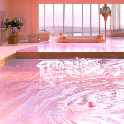

In [74]:
cropped = image[40:h-40, 40:w-40] # center crop

imshow(cropped)

### Shifting / Translation

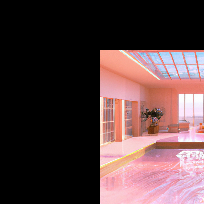

In [75]:
shift_w = 100  # shift to right by 100
whift_h = 50  # shift to bottom by 50
shift_matrix = np.float32([[1, 0, shift_w], [0, 1, whift_h]])
shifted = cv2.warpAffine(image, shift_matrix, (w, h))

imshow(shifted)

### Flipping

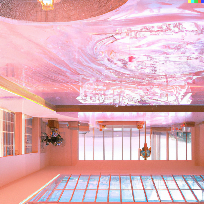

In [76]:
flip_vertical = cv2.flip(image, 0)
imshow(flip_vertical)

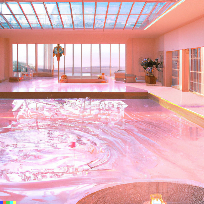

In [77]:
flip_horizontal = cv2.flip(image, 1)
imshow(flip_horizontal)

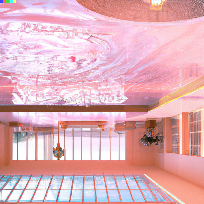

In [78]:
flip_both = cv2.flip(image, -1)
imshow(flip_both)

## Color space conversion

### Gray scale
Sometimes, you might want to build a model that doesn't need color information. Reducing the images to gray scale can save computations for a model.

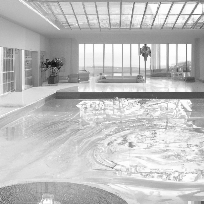

In [79]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray)

## Changing brightness

The below code is only to show that you can change the brightness with OpenCV. Usually, you can use Keras and many other frameworks that automatically manipulate the images for you.

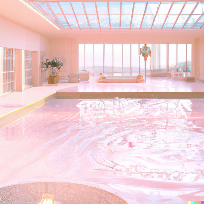

In [80]:
gamma = 2
invGamma = 1.0 / gamma

table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

# for each pixel of the image, look up to table and fetch the value
# for example, if table[3] = 22, the pixel with value 3 will be 22
brighter = cv2.LUT(image, table)

imshow(brighter)

### Binary thresholding

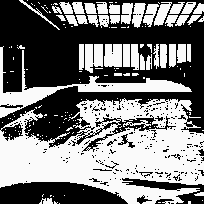

In [81]:
# if the pixel value is smaller than 200, make it 0
# else, make it 250
(T, thresh) = cv2.threshold(gray, 200, 250, cv2.THRESH_BINARY)
imshow(thresh)